<a href="https://colab.research.google.com/github/vinicius-marques1/Cognizant_Cloud_Data_Engineer/blob/main/Aula_de_An%C3%A1lise_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula sobre análise de dados usando a biblioteca Pandas do python
Nessa aula foi feita a análise de dados das lojas de duas cidades: Salvador e Recife. 

In [1]:
import pandas as pd

In [22]:
import matplotlib.pyplot as plt

In [57]:
plt.style.use('seaborn-deep')

In [2]:
df_salvador = pd.read_excel('Salvador.xlsx')
df_recife = pd.read_excel('Recife.xlsx')

In [4]:
df_recife

,Cidade,Data,Vendas,LojaID,Qtde
0,Recife,2019-01-01,162.61,981,1
1,Recife,2019-01-01,11.44,983,1
2,Recife,2019-02-10,12.94,983,5
3,Recife,2019-02-10,160.54,981,3
4,Recife,2019-02-14,19.89,983,7
...,...,...,...,...,...
137,Recife,2019-03-02,51.99,983,3
138,Recife,2019-03-02,150.38,983,6
139,Recife,2019-03-02,141.16,980,7
140,Recife,2019-03-02,166.89,983,5


In [5]:
df_final = pd.concat([df_salvador,df_recife])

In [11]:
df_final.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [12]:
df_final['LojaID'] = df_final['LojaID'].astype('object')

In [13]:
df_final.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [14]:
df_final.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

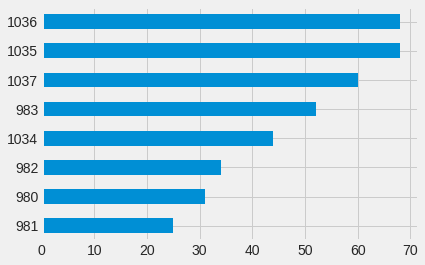

In [52]:
df_final['LojaID'].value_counts(ascending=True).plot.barh()

In [32]:
df_final['Receita'] = df_final.Vendas * df_final.Qtde

In [36]:
df_final

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Salvador,2018-01-01,31.06,1037,3,93.18
1,Salvador,2018-01-01,19.02,1034,3,57.06
2,Salvador,2019-02-10,173.59,1035,3,520.77
3,Salvador,2019-02-10,176.34,1037,3,529.02
4,Salvador,2019-02-14,19.47,1037,3,58.41
...,...,...,...,...,...,...
137,Recife,2019-03-02,51.99,983,3,155.97
138,Recife,2019-03-02,150.38,983,6,902.28
139,Recife,2019-03-02,141.16,980,7,988.12
140,Recife,2019-03-02,166.89,983,5,834.45


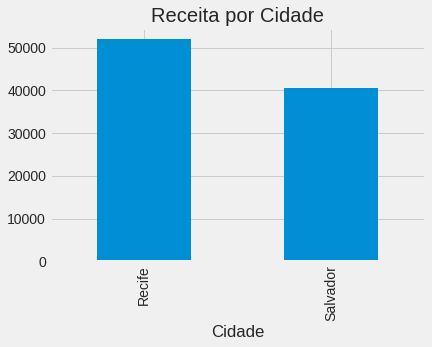

In [53]:
df_final.groupby(['Cidade']).Receita.sum().plot.bar(title='Receita por Cidade',)

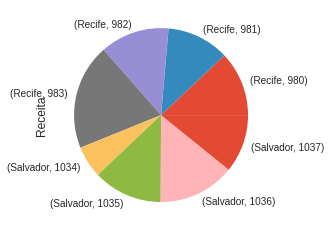

In [41]:
df_final.groupby(['Cidade' ,'LojaID']).Receita.sum().plot.pie()

Text(0, 0.5, 'Total de vendas')

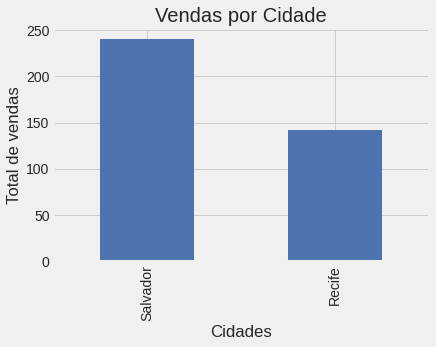

In [58]:
df_final['Cidade'].value_counts(ascending=False).plot.bar(title='Vendas por Cidade')
plt.xlabel('Cidades')
plt.ylabel('Total de vendas')

In [63]:
df_final['Mês'] = df_final.Data.dt.month

In [75]:
lista_mes = ['Jan','Fev','Mar']
mes_num = df_final['Mês'].unique()
for i, n in enumerate(mes_num):
  df_final['Mês'] = df_final['Mês'].replace(n,lista_mes[i])

In [76]:
df_final

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Mês
0,Salvador,2018-01-01,31.06,1037,3,93.18,Jan
1,Salvador,2018-01-01,19.02,1034,3,57.06,Jan
2,Salvador,2019-02-10,173.59,1035,3,520.77,Fev
3,Salvador,2019-02-10,176.34,1037,3,529.02,Fev
4,Salvador,2019-02-14,19.47,1037,3,58.41,Fev
...,...,...,...,...,...,...,...
137,Recife,2019-03-02,51.99,983,3,155.97,Mar
138,Recife,2019-03-02,150.38,983,6,902.28,Mar
139,Recife,2019-03-02,141.16,980,7,988.12,Mar
140,Recife,2019-03-02,166.89,983,5,834.45,Mar


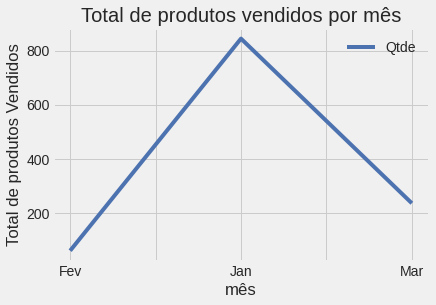

In [89]:
df_final.groupby(['Mês']).Qtde.sum().plot(title='Total de produtos vendidos por mês')
plt.xlabel('mês')
plt.ylabel('Total de produtos Vendidos')
plt.legend()

Text(0.5, 1.0, 'Vendas por Quantidades de Produtos Vendidos')

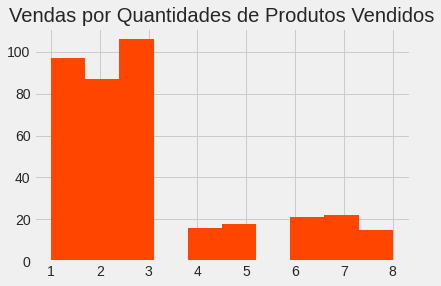

In [98]:
plt.hist(x= df_final['Qtde'], color='orangered')
plt.title('Vendas por Quantidades de Produtos Vendidos')